In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score,mean_squared_log_error,r2_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [2]:
# Read the file
df = pd.read_csv('C:/Users/Rizwan/Downloads/revise-hackathon/Train.csv')

In [4]:
df.head(10)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,1.00,1.00,1.00,1.00,593.20,1244.14,787.00,6885.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,Y,1674.09,20014.00
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,1.00,1.00,1.00,1.00,213557.15,172678.56,90525.00,1500.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,Y,13043.34,10173.00
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,1.00,1.00,1.00,1.00,165907.57,470000.00,25524.00,3735.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,Y,25375.27,16095.00
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,1.00,1.00,1.00,1.00,81872.65,223379.40,48500.00,-4679.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,Y,3544.33,7707.00
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,1.00,1.00,1.00,1.00,568.80,385000.00,183999.00,6916.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,Y,12780.44,96408.00
5,19106,current,M,27,958,2328.22,1597.54,19979.75,1045.85,11686.25,628.00,6.00,7.00,59.00,25.00,3.00,12.00,150000.00,1.00,1.00,1.00,1.00,63590.40,142608.50,96558.00,-4664.00,33149.03,34463.00,11.00,2.00,18433.00,35826.70,19584.00,43.00,2.00,21440.00,52292.68,199925.50,2.00,35.00,17284.00,Y,5026.50,130263.00
6,10086,current,M,32,805,1643.81,5009.13,8921.62,2151.00,6677.95,1185.00,10.00,2.00,5.00,1.00,44.00,17.00,187000.00,1.00,1.00,1.00,1.00,48796.45,74599.90,33774.00,3983.00,23194.85,18825.00,42.00,5.00,19157.00,56060.50,64994.00,2.00,25.00,20444.00,27354.56,200391.00,58.00,12.00,6779.00,Y,1534.93,113479.00
7,3045,current,M,28,448,5768.50,1963.00,84272.63,1956.00,6794.46,1225.00,26.00,1.00,59.00,25.00,2.00,7.00,120000.00,1.00,1.00,1.00,1.00,291969.20,51531.00,19400.00,5464.00,15211.28,74444.00,46.00,15.00,58876.00,47179.94,78997.00,1.00,63.00,5473.00,52411.93,7422.00,5.00,58.00,56900.00,Y,14689.56,7463.00
8,17368,current,F,67,631,721.00,2405.90,28933.37,5672.00,21473.00,1009.00,92.00,34.00,84.00,1.00,18.00,1.00,110000.00,1.00,1.00,1.00,1.00,9624.60,156215.30,24619.00,4856.00,37737.64,57512.00,2.00,4.00,10887.00,32616.00,36852.00,70.00,81.00,27418.00,59500.90,10425.53,2.00,79.00,12626.00,Y,4583.09,5712.00
9,9756,current,M,37,516,48575.24,4003.80,2112.49,2572.00,15782.52,5623.40,6.00,4.00,87.00,51.00,3.00,34.00,170000.00,1.00,1.00,1.00,1.00,139323.25,135552.85,4000.00,-5439.00,64904.66,14864.78,103.00,36.00,71395.00,71617.81,120696.00,17.00,82.00,1145.00,285604.50,49972.50,2.00,63.00,18524.00,Y,16839.22,7647.00


In [5]:
# observe statistics of individual columns using describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,15000.00,10032.08,5760.37,1.00,5060.50,10054.00,15015.25,19998.00
age,15000.00,47.79,30.63,25.00,33.00,40.00,53.00,223.00
region_code,15000.00,598.42,220.06,123.00,424.00,623.00,799.00,974.00
cc_cons_apr,15000.00,17957.39,25187.94,253.00,4411.03,10288.10,21405.00,441031.33
dc_cons_apr,15000.00,8171.10,14773.03,19.35,1634.00,3996.90,9339.02,229255.00
cc_cons_may,15000.00,16337.05,27060.85,157.00,3638.00,8695.03,18951.30,1117246.31
dc_cons_may,15000.00,7703.61,18987.30,22.00,1643.50,3820.50,8212.00,911223.49
cc_cons_jun,15000.00,12129.01,18488.78,65.00,3004.50,6655.25,14247.00,382914.10
dc_cons_jun,15000.00,7097.40,13251.70,62.00,1358.75,3327.00,7597.00,233384.00
cc_count_apr,15000.00,41.49,97.43,1.00,5.00,10.00,44.00,531.00


In [6]:
# To have complete view of columns (no dots (...)) 
df.set_index('ID',inplace = True)

In [7]:
df.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,1.00,1.00,1.00,1.00,593.20,1244.14,787.00,6885.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,Y,1674.09,20014.00
17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,1.00,1.00,1.00,1.00,213557.15,172678.56,90525.00,1500.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,Y,13043.34,10173.00
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,1.00,1.00,1.00,1.00,165907.57,470000.00,25524.00,3735.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,Y,25375.27,16095.00
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,1.00,1.00,1.00,1.00,81872.65,223379.40,48500.00,-4679.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,Y,3544.33,7707.00
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,1.00,1.00,1.00,1.00,568.80,385000.00,183999.00,6916.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,Y,12780.44,96408.00


In [8]:
# finding correlation among predictors and predictors with target 
df.corr()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
age,1.00,0.01,0.01,0.02,-0.00,-0.00,-0.01,0.01,0.00,0.00,0.00,0.01,-0.01,0.01,0.00,nan,nan,nan,nan,0.00,0.01,0.02,0.01,0.01,0.01,0.00,-0.00,0.00,0.01,-0.01,0.00,0.02,0.01,-0.00,-0.01,-0.01,0.00,-0.00,0.00,-0.01
region_code,0.01,1.00,0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.01,-0.02,-0.00,-0.02,-0.00,nan,nan,nan,nan,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.01,0.01,-0.01,0.02,-0.01,0.00,-0.00,0.02,0.00,0.00,0.01,0.00,0.00,-0.02
cc_cons_apr,0.01,0.01,1.00,0.00,0.00,0.00,0.01,-0.00,-0.00,0.01,0.01,0.00,-0.00,0.01,0.01,nan,nan,nan,nan,0.01,-0.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.01,0.01,-0.00,0.00,0.01
dc_cons_apr,0.02,-0.01,0.00,1.00,0.00,-0.01,0.00,-0.01,0.00,-0.00,0.01,0.01,-0.00,0.01,-0.01,nan,nan,nan,nan,0.00,-0.01,-0.01,0.01,-0.00,0.01,-0.00,-0.01,-0.01,-0.01,0.01,0.00,0.00,0.00,-0.00,-0.01,-0.01,-0.00,-0.02,0.00,-0.00
cc_cons_may,-0.00,-0.01,0.00,0.00,1.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,nan,nan,nan,nan,0.00,-0.00,0.01,0.01,0.00,-0.00,0.02,-0.02,0.01,0.00,0.01,-0.00,-0.00,0.01,-0.01,0.01,0.00,-0.01,-0.00,0.00,0.02
dc_cons_may,-0.00,0.01,0.00,-0.01,-0.01,1.00,-0.01,0.00,0.00,0.01,-0.00,-0.02,0.00,-0.00,-0.01,nan,nan,nan,nan,-0.01,0.00,-0.01,0.01,0.00,0.01,-0.02,-0.01,-0.00,0.02,-0.01,-0.00,-0.00,0.02,-0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00
cc_cons_jun,-0.01,-0.01,0.01,0.00,-0.01,-0.01,1.00,0.00,0.00,0.00,0.01,-0.01,-0.01,0.00,0.00,nan,nan,nan,nan,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,-0.01,-0.00,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00
dc_cons_jun,0.01,0.01,-0.00,-0.01,-0.00,0.00,0.00,1.00,-0.01,0.00,0.00,0.00,-0.00,0.00,0.00,nan,nan,nan,nan,-0.01,0.01,-0.00,0.01,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.01,-0.01,-0.01,0.00,0.00
cc_count_apr,0.00,-0.00,-0.00,0.00,-0.01,0.00,0.00,-0.01,1.00,-0.00,0.01,-0.01,-0.01,0.00,-0.00,nan,nan,nan,nan,-0.00,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,-0.00,-0.01,0.00,-0.00,-0.02,-0.01,-0.01,-0.01
cc_count_may,0.00,0.01,0.01,-0.00,-0.00,0.01,0.00,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,0.01,nan,nan,nan,nan,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.00,0.01,0.01,0.03,0.04,-0.00,-0.00,0.01,-0.00,0.00,-0.01,0.02


In [9]:
# Replacing age with greater than 75 with median of age
df.loc[df['age']>75,'age'] = df['age'].median()

In [10]:
# Separating catagorical and numerical columns
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')

In [11]:
num_col

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35.00,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,1.00,1.00,1.00,1.00,593.20,1244.14,787.00,6885.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,1674.09,20014.00
17645,35.00,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,1.00,1.00,1.00,1.00,213557.15,172678.56,90525.00,1500.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,13043.34,10173.00
7604,55.00,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,1.00,1.00,1.00,1.00,165907.57,470000.00,25524.00,3735.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,25375.27,16095.00
1590,29.00,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,1.00,1.00,1.00,1.00,81872.65,223379.40,48500.00,-4679.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,3544.33,7707.00
16556,34.00,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,1.00,1.00,1.00,1.00,568.80,385000.00,183999.00,6916.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,12780.44,96408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.00,653,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.00,36.00,3.00,44.00,55.00,29.00,520000.00,1.00,1.00,1.00,1.00,186189.00,24000.00,16215.00,977.00,30608.54,31135.00,79.00,2.00,27608.00,30501.77,23692.00,1.00,8.00,6936.00,487751.19,42625.50,14.00,8.00,82851.00,78966.76,4263.00
10376,44.00,535,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.00,34.00,4.00,7.00,1.00,2.00,472000.00,1.00,1.00,1.00,1.00,24832.00,221000.00,12337.00,-6281.38,39903.00,23797.00,43.00,2.00,30512.00,57918.69,50023.00,4.00,20.00,202639.00,8666.01,34987.55,11.00,18.00,118110.47,4762.10,11019.00
2181,37.00,464,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.00,23.00,61.00,24.00,3.00,3.00,44000.00,1.00,1.00,1.00,1.00,180615.02,253000.00,25000.00,10210.00,29525.63,95477.27,4.00,1.00,41085.00,25404.75,35239.00,43.00,5.00,44421.00,97896.48,261432.00,4.00,73.00,49545.00,2877.33,404227.00


In [12]:
# dropping columns which will not impact the prediction
num_col.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','region_code','investment_4'],axis = 1,inplace = True)

In [13]:
num_col

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35.00,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.00,26.00,10.00,48.00,14.00,47.00,430000.00,593.20,1244.14,787.00,85919.48,25192.00,24.00,6.00,25296.00,11527.50,191777.13,2.00,40.00,24563.00,30051.32,12761.00,2.00,65.00,50836.00,1674.09,20014.00
17645,35.00,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.00,7.00,13.00,3.00,21.00,31.00,127500.00,213557.15,172678.56,90525.00,12255.75,88693.37,35.00,36.00,80750.00,92276.57,71162.00,2.00,78.00,23948.00,42119.05,76206.00,21.00,63.00,23226.00,13043.34,10173.00
7604,55.00,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.00,32.00,102.00,4.00,1.00,80.00,199999.00,165907.57,470000.00,25524.00,34193.00,84880.00,72.00,9.00,38466.00,19343.00,70978.00,2.00,82.00,10752.00,58373.25,75283.00,7.00,1.00,27036.00,25375.27,16095.00
1590,29.00,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.00,1.00,50.00,1.00,1.00,10.00,155000.00,81872.65,223379.40,48500.00,11558.23,236326.00,43.00,30.00,52732.00,43867.91,63033.84,23.00,38.00,12607.00,69851.51,68708.00,21.00,83.00,43037.00,3544.33,7707.00
16556,34.00,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.00,47.00,82.00,54.00,16.00,68.00,297000.00,568.80,385000.00,183999.00,17022.81,58897.03,46.00,36.00,19613.00,153253.71,30286.00,24.00,50.00,25213.00,10071.00,80140.00,8.00,32.00,32044.00,12780.44,96408.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.00,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.00,36.00,3.00,44.00,55.00,29.00,520000.00,186189.00,24000.00,16215.00,30608.54,31135.00,79.00,2.00,27608.00,30501.77,23692.00,1.00,8.00,6936.00,487751.19,42625.50,14.00,8.00,82851.00,78966.76,4263.00
10376,44.00,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.00,34.00,4.00,7.00,1.00,2.00,472000.00,24832.00,221000.00,12337.00,39903.00,23797.00,43.00,2.00,30512.00,57918.69,50023.00,4.00,20.00,202639.00,8666.01,34987.55,11.00,18.00,118110.47,4762.10,11019.00
2181,37.00,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.00,23.00,61.00,24.00,3.00,3.00,44000.00,180615.02,253000.00,25000.00,29525.63,95477.27,4.00,1.00,41085.00,25404.75,35239.00,43.00,5.00,44421.00,97896.48,261432.00,4.00,73.00,49545.00,2877.33,404227.00


age


Text(0.5, 1.0, 'plotting distribution: age')

Text(0.5, 0, 'age')

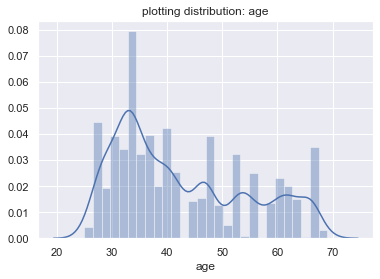

cc_cons_apr


Text(0.5, 1.0, 'plotting distribution: cc_cons_apr')

Text(0.5, 0, 'cc_cons_apr')

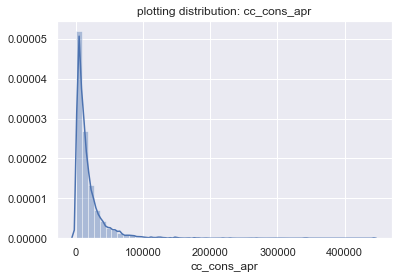

dc_cons_apr


Text(0.5, 1.0, 'plotting distribution: dc_cons_apr')

Text(0.5, 0, 'dc_cons_apr')

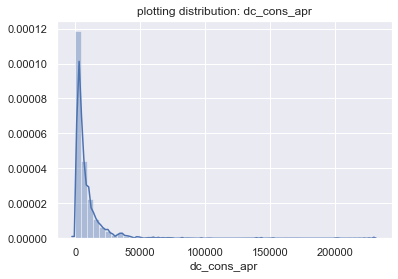

cc_cons_may


Text(0.5, 1.0, 'plotting distribution: cc_cons_may')

Text(0.5, 0, 'cc_cons_may')

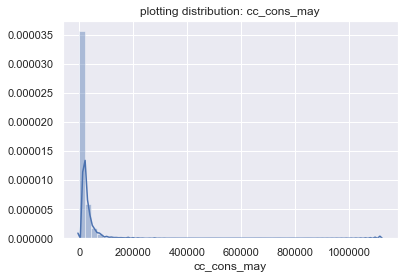

dc_cons_may


Text(0.5, 1.0, 'plotting distribution: dc_cons_may')

Text(0.5, 0, 'dc_cons_may')

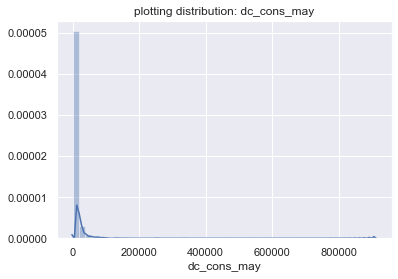

cc_cons_jun


Text(0.5, 1.0, 'plotting distribution: cc_cons_jun')

Text(0.5, 0, 'cc_cons_jun')

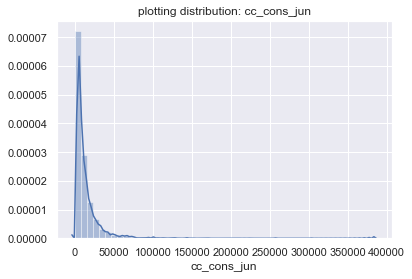

dc_cons_jun


Text(0.5, 1.0, 'plotting distribution: dc_cons_jun')

Text(0.5, 0, 'dc_cons_jun')

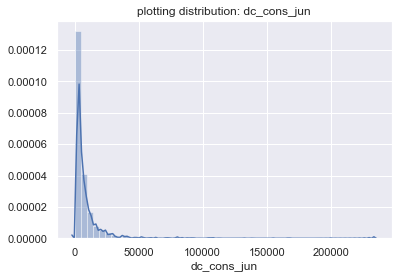

cc_count_apr


Text(0.5, 1.0, 'plotting distribution: cc_count_apr')

Text(0.5, 0, 'cc_count_apr')

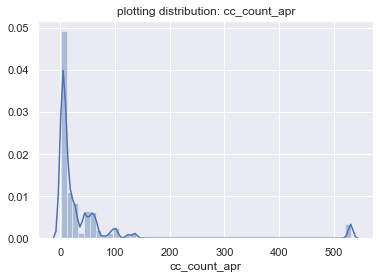

cc_count_may


Text(0.5, 1.0, 'plotting distribution: cc_count_may')

Text(0.5, 0, 'cc_count_may')

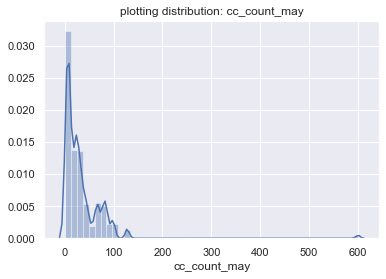

cc_count_jun


Text(0.5, 1.0, 'plotting distribution: cc_count_jun')

Text(0.5, 0, 'cc_count_jun')

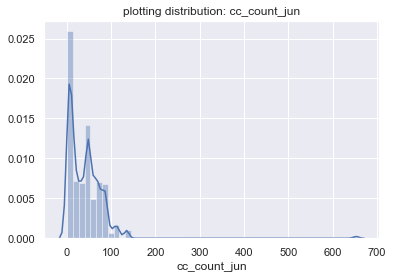

dc_count_apr


Text(0.5, 1.0, 'plotting distribution: dc_count_apr')

Text(0.5, 0, 'dc_count_apr')

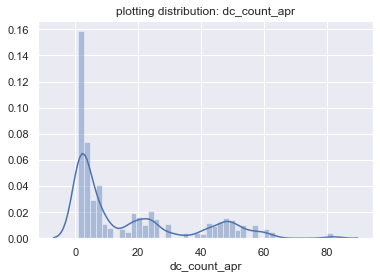

dc_count_may


Text(0.5, 1.0, 'plotting distribution: dc_count_may')

Text(0.5, 0, 'dc_count_may')

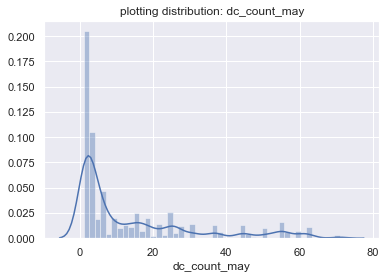

dc_count_jun


Text(0.5, 1.0, 'plotting distribution: dc_count_jun')

Text(0.5, 0, 'dc_count_jun')

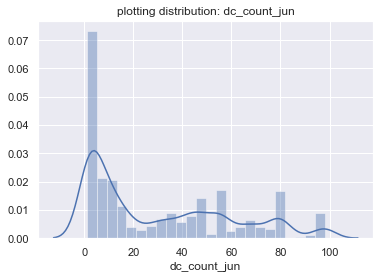

card_lim


Text(0.5, 1.0, 'plotting distribution: card_lim')

Text(0.5, 0, 'card_lim')

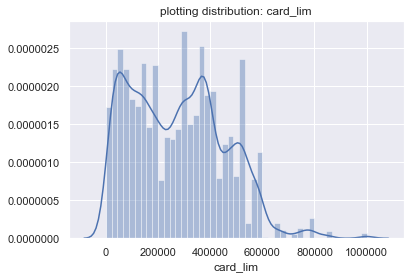

investment_1


Text(0.5, 1.0, 'plotting distribution: investment_1')

Text(0.5, 0, 'investment_1')

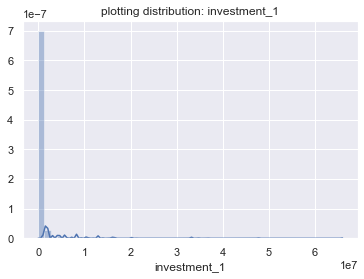

investment_2


Text(0.5, 1.0, 'plotting distribution: investment_2')

Text(0.5, 0, 'investment_2')

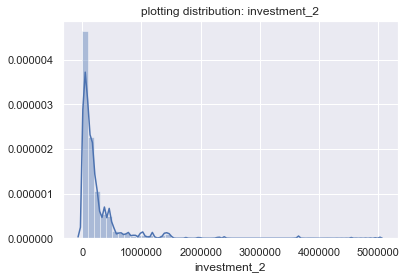

investment_3


Text(0.5, 1.0, 'plotting distribution: investment_3')

Text(0.5, 0, 'investment_3')

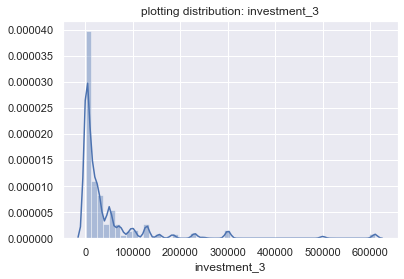

debit_amount_apr


Text(0.5, 1.0, 'plotting distribution: debit_amount_apr')

Text(0.5, 0, 'debit_amount_apr')

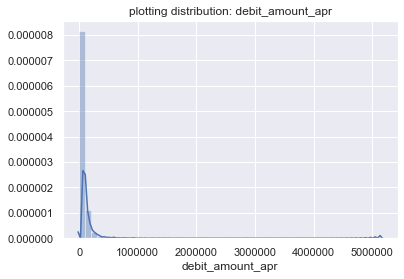

credit_amount_apr


Text(0.5, 1.0, 'plotting distribution: credit_amount_apr')

Text(0.5, 0, 'credit_amount_apr')

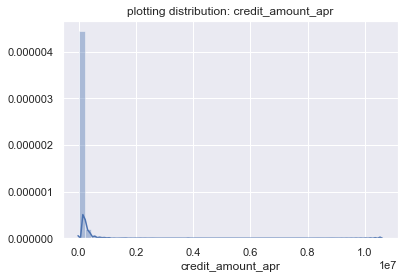

debit_count_apr


Text(0.5, 1.0, 'plotting distribution: debit_count_apr')

Text(0.5, 0, 'debit_count_apr')

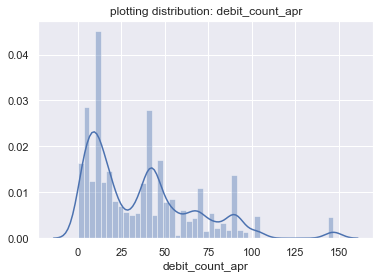

credit_count_apr


Text(0.5, 1.0, 'plotting distribution: credit_count_apr')

Text(0.5, 0, 'credit_count_apr')

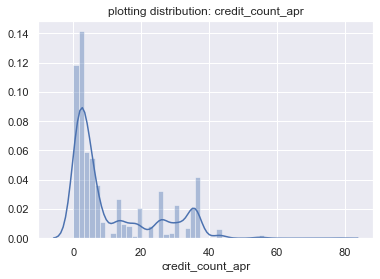

max_credit_amount_apr


Text(0.5, 1.0, 'plotting distribution: max_credit_amount_apr')

Text(0.5, 0, 'max_credit_amount_apr')

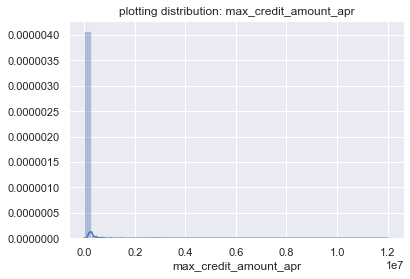

debit_amount_may


Text(0.5, 1.0, 'plotting distribution: debit_amount_may')

Text(0.5, 0, 'debit_amount_may')

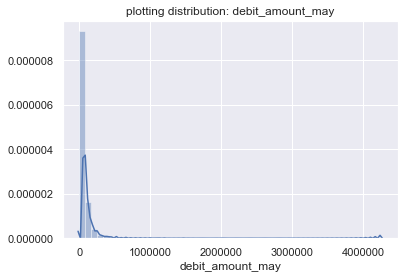

credit_amount_may


Text(0.5, 1.0, 'plotting distribution: credit_amount_may')

Text(0.5, 0, 'credit_amount_may')

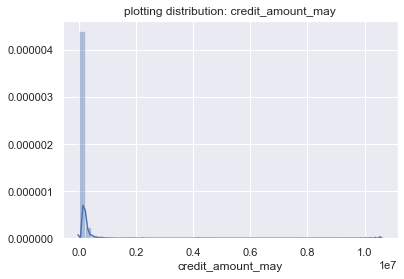

credit_count_may


Text(0.5, 1.0, 'plotting distribution: credit_count_may')

Text(0.5, 0, 'credit_count_may')

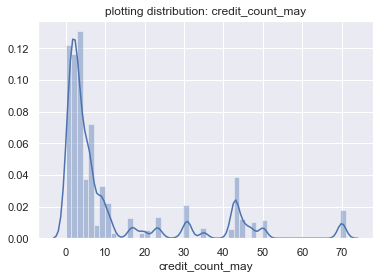

debit_count_may


Text(0.5, 1.0, 'plotting distribution: debit_count_may')

Text(0.5, 0, 'debit_count_may')

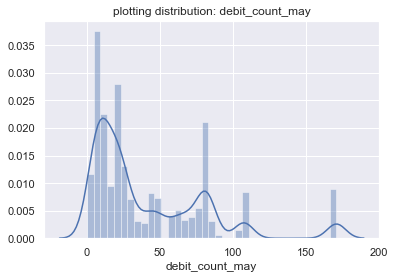

max_credit_amount_may


Text(0.5, 1.0, 'plotting distribution: max_credit_amount_may')

Text(0.5, 0, 'max_credit_amount_may')

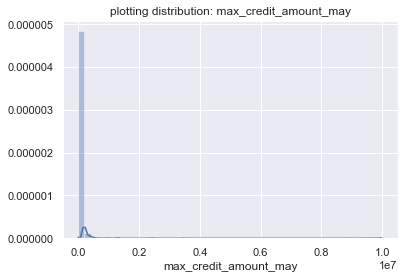

debit_amount_jun


Text(0.5, 1.0, 'plotting distribution: debit_amount_jun')

Text(0.5, 0, 'debit_amount_jun')

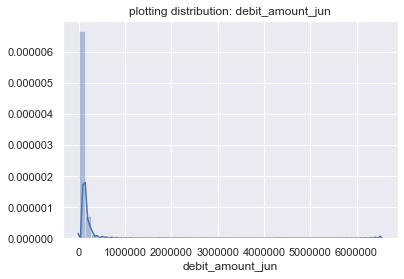

credit_amount_jun


Text(0.5, 1.0, 'plotting distribution: credit_amount_jun')

Text(0.5, 0, 'credit_amount_jun')

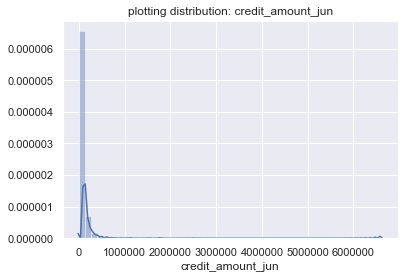

credit_count_jun


Text(0.5, 1.0, 'plotting distribution: credit_count_jun')

Text(0.5, 0, 'credit_count_jun')

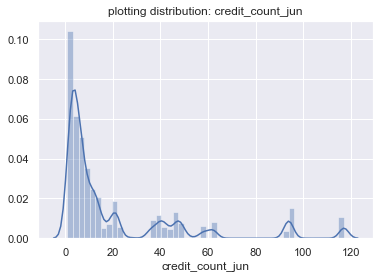

debit_count_jun


Text(0.5, 1.0, 'plotting distribution: debit_count_jun')

Text(0.5, 0, 'debit_count_jun')

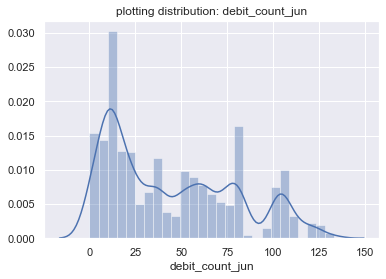

max_credit_amount_jun


Text(0.5, 1.0, 'plotting distribution: max_credit_amount_jun')

Text(0.5, 0, 'max_credit_amount_jun')

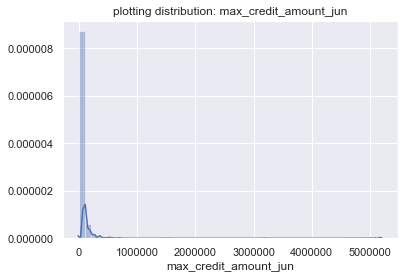

emi_active


Text(0.5, 1.0, 'plotting distribution: emi_active')

Text(0.5, 0, 'emi_active')

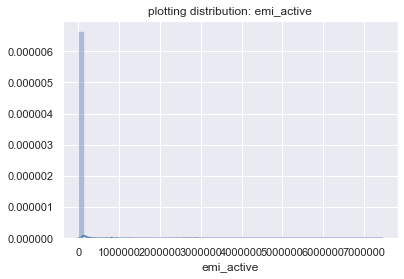

cc_cons


Text(0.5, 1.0, 'plotting distribution: cc_cons')

Text(0.5, 0, 'cc_cons')

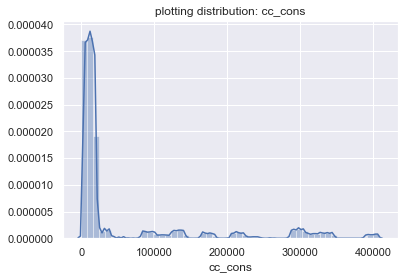

In [16]:
# histogram plot of numerical columns using for loop
for col in num_col.columns:
    print(col)
    sns.distplot(num_col[col])
    plt.title('plotting distribution: ' + col)
    plt.xlabel(col)
    plt.show()

In [17]:
# calculating skewness
num_col.skew()

age                      0.59
cc_cons_apr              4.84
dc_cons_apr              7.14
cc_cons_may             12.06
dc_cons_may             25.32
cc_cons_jun              6.11
dc_cons_jun              6.57
cc_count_apr             4.42
cc_count_may             7.52
cc_count_jun             7.19
dc_count_apr             1.10
dc_count_may             1.53
dc_count_jun             0.73
card_lim                 0.44
investment_1            11.60
investment_2             5.48
investment_3             4.08
debit_amount_apr        13.10
credit_amount_apr       32.63
debit_count_apr          1.09
credit_count_apr         1.16
max_credit_amount_apr   47.95
debit_amount_may        10.30
credit_amount_may       23.39
credit_count_may         1.83
debit_count_may          1.49
max_credit_amount_may   35.92
debit_amount_jun        19.38
credit_amount_jun       14.86
credit_count_jun         2.08
debit_count_jun          0.57
max_credit_amount_jun   22.34
emi_active              30.39
cc_cons   

In [18]:
# treatment ofg skewed columns using square root
for col in num_col.columns:
    if num_col[col].skew()>1:
        num_col[col] = np.sqrt(num_col[col])

In [19]:
num_col

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35.00,157.78,19.44,101.43,172.23,127.64,106.92,1.41,5.10,3.16,6.93,3.74,47.00,430000.00,24.36,35.27,28.05,293.12,158.72,4.90,2.45,159.05,107.37,437.92,1.41,6.32,156.73,173.35,112.96,1.41,65.00,225.47,40.92,141.47
17645,35.00,137.63,31.08,143.78,16.94,64.94,29.75,1.00,2.65,3.61,1.73,4.58,31.00,127500.00,462.12,415.55,300.87,110.71,297.81,5.92,6.00,284.17,303.77,266.76,1.41,8.83,154.75,205.23,276.05,4.58,63.00,152.40,114.21,100.86
7604,55.00,75.36,52.19,44.32,62.71,154.78,71.89,6.56,5.66,10.10,2.00,1.00,80.00,199999.00,407.32,685.57,159.76,184.91,291.34,8.49,3.00,196.13,139.08,266.42,1.41,9.06,103.69,241.61,274.38,2.65,1.00,164.43,159.30,126.87
1590,29.00,174.61,35.16,112.29,95.59,132.37,116.83,7.28,1.00,7.07,1.00,1.00,10.00,155000.00,286.13,472.63,220.23,107.51,486.13,6.56,5.48,229.63,209.45,251.07,4.80,6.16,112.28,264.29,262.12,4.58,83.00,207.45,59.53,87.79
16556,34.00,86.26,83.10,66.06,44.03,46.05,82.64,8.19,6.86,9.06,7.35,4.00,68.00,297000.00,23.85,620.48,428.95,130.47,242.69,6.78,6.00,140.05,391.48,174.03,4.90,7.07,158.79,100.35,283.09,2.83,32.00,179.01,113.05,310.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53.00,102.19,34.91,85.16,62.23,81.44,100.53,1.73,6.00,1.73,6.63,7.42,29.00,520000.00,431.50,154.92,127.34,174.95,176.45,8.89,1.41,166.16,174.65,153.92,1.00,2.83,83.28,698.39,206.46,3.74,8.00,287.84,281.01,65.29
10376,44.00,172.89,79.42,126.59,87.24,47.04,29.01,1.00,5.83,2.00,2.65,1.00,2.00,472000.00,157.58,470.11,111.07,199.76,154.26,6.56,1.41,174.68,240.66,223.66,2.00,4.47,450.15,93.09,187.05,3.32,18.00,343.67,69.01,104.97
2181,37.00,64.41,30.80,139.14,22.23,210.63,42.45,7.55,4.80,7.81,4.90,1.73,3.00,44000.00,424.99,502.99,158.11,171.83,308.99,2.00,1.00,202.69,159.39,187.72,6.56,2.24,210.76,312.88,511.30,2.00,73.00,222.59,53.64,635.79


In [ ]:
# histogram plot after skewness treatment
for col in num_col.columns:
    print(col)
    sns.distplot(num_col[col])
    plt.title('plotting distribution' + col)
    plt.xlabel(col)
    plt.show()

In [20]:
# checking the skewness values after treatment
num_col.skew()

age                     0.59
cc_cons_apr             1.63
dc_cons_apr             2.21
cc_cons_may             2.00
dc_cons_may             3.29
cc_cons_jun             1.89
dc_cons_jun             2.32
cc_count_apr            2.65
cc_count_may            1.68
cc_count_jun            0.93
dc_count_apr            0.59
dc_count_may            0.88
dc_count_jun            0.73
card_lim                0.44
investment_1            4.71
investment_2            1.78
investment_3            1.83
debit_amount_apr        2.42
credit_amount_apr       4.07
debit_count_apr         0.24
credit_count_apr        0.59
max_credit_amount_apr   7.22
debit_amount_may        2.21
credit_amount_may       3.27
credit_count_may        1.16
debit_count_may         0.65
max_credit_amount_may   6.44
debit_amount_jun        3.40
credit_amount_jun       2.80
credit_count_jun        1.30
debit_count_jun         0.57
max_credit_amount_jun   4.16
emi_active              8.77
cc_cons                 1.61
dtype: float64

In [21]:
# outlier detection
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(num_col)

,Feature,Number of Outliers
0,age,0
1,cc_cons_apr,497
2,dc_cons_apr,599
3,cc_cons_may,557
4,dc_cons_may,641
5,cc_cons_jun,562
6,dc_cons_jun,655
7,cc_count_apr,523
8,cc_count_may,73
9,cc_count_jun,49


In [22]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(num_col)

# Checking for outliers after applying winsorization
detect_outliers(num_col)

,Feature,Number of Outliers
0,age,0
1,cc_cons_apr,0
2,dc_cons_apr,0
3,cc_cons_may,0
4,dc_cons_may,0
5,cc_cons_jun,0
6,dc_cons_jun,0
7,cc_count_apr,0
8,cc_count_may,0
9,cc_count_jun,0


In [26]:
# one hot encoding of ctegorical variables
ohe=pd.get_dummies(cat_col)
ohe.drop('loan_enq_Y',1,inplace = True)
df = pd.concat([ohe,num_col],1)

In [27]:
df

,account_type_current,account_type_saving,gender_F,gender_M,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0,1,35.00,157.78,19.44,101.43,126.80,127.64,106.92,1.41,5.10,3.16,6.93,3.74,47.00,430000.00,24.36,40.39,28.05,293.12,158.72,4.90,2.45,159.05,107.37,415.13,1.41,6.32,156.73,173.35,112.96,1.41,65.00,225.47,40.92,141.47
17645,1,0,0,1,35.00,137.63,31.08,143.78,20.27,64.94,29.75,1.00,2.65,3.61,1.73,4.58,31.00,127500.00,462.12,415.55,300.87,110.71,297.81,5.92,5.92,284.17,303.77,266.76,1.41,8.83,154.75,205.23,276.05,4.58,63.00,152.40,114.21,100.86
7604,1,0,0,1,55.00,75.36,52.19,44.32,62.71,154.78,71.89,6.56,5.66,9.22,2.00,1.00,79.00,199999.00,407.32,685.57,159.76,184.91,291.34,8.49,3.00,196.13,139.08,266.42,1.41,9.06,103.69,241.61,274.38,2.65,2.00,164.43,140.78,126.87
1590,1,0,1,0,29.00,174.61,35.16,112.29,95.59,132.37,116.83,7.28,1.41,7.07,1.00,1.00,10.00,155000.00,286.13,472.63,220.23,107.51,392.52,6.56,5.48,229.63,209.45,251.07,4.80,6.16,112.28,264.29,262.12,4.58,83.00,207.45,59.53,87.79
16556,1,0,0,1,34.00,86.26,83.10,66.06,44.03,46.05,82.64,8.19,6.86,9.06,7.07,4.00,68.00,297000.00,23.85,620.48,354.97,130.47,242.69,6.78,5.92,140.05,369.19,174.03,4.90,7.07,158.79,100.35,283.09,2.83,32.00,179.01,113.05,310.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0,1,0,53.00,102.19,34.91,85.16,62.23,81.44,100.53,1.73,6.00,1.73,6.63,6.63,29.00,520000.00,431.50,154.92,127.34,174.95,176.45,8.89,1.41,166.16,174.65,153.92,1.00,2.83,83.28,386.75,206.46,3.74,8.00,287.84,140.78,65.29
10376,1,0,0,1,44.00,172.89,79.42,126.59,87.24,47.04,29.01,1.00,5.83,2.00,2.65,1.00,2.00,472000.00,157.58,470.11,111.07,199.76,154.26,6.56,1.41,174.68,240.66,223.66,2.00,4.47,320.16,93.09,187.05,3.32,18.00,316.52,69.01,104.97
2181,1,0,0,1,37.00,64.41,30.80,139.14,22.23,164.45,42.45,7.55,4.80,7.81,4.90,1.73,3.00,44000.00,424.99,502.99,158.11,171.83,308.99,2.00,1.00,202.69,159.39,187.72,6.56,2.24,210.76,312.88,396.87,2.00,73.00,222.59,53.64,468.71


In [28]:
# separation of predictors(X) and target(Y):
X = df.drop(['cc_cons'],1)
y = df['cc_cons']

In [29]:
# Scaling the predictors 
columns = X.columns
from sklearn.preprocessing import  MinMaxScaler
scaler =  MinMaxScaler()
X[columns] = scaler.fit_transform(X[columns])

In [30]:
X

,account_type_current,account_type_saving,gender_F,gender_M,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,1.00,0.00,0.00,1.00,0.21,0.73,0.00,0.44,1.00,0.73,0.82,0.05,0.48,0.19,0.98,0.49,0.59,0.81,0.01,0.00,0.01,0.73,0.24,0.43,0.41,0.27,0.11,1.00,0.07,0.60,0.33,0.29,0.15,0.00,0.62,0.67,0.21
17645,1.00,0.00,0.00,1.00,0.21,0.61,0.10,0.70,0.00,0.27,0.09,0.00,0.16,0.25,0.12,0.64,0.38,0.20,0.52,0.57,0.84,0.13,0.69,0.57,1.00,0.87,0.78,0.56,0.07,0.95,0.33,0.40,0.64,0.51,0.60,0.40,0.79
7604,1.00,0.00,0.00,1.00,0.79,0.24,0.28,0.08,0.40,0.93,0.49,0.70,0.55,1.00,0.16,0.00,1.00,0.35,0.46,0.99,0.41,0.38,0.67,0.92,0.51,0.45,0.22,0.56,0.07,0.98,0.12,0.52,0.63,0.20,0.00,0.45,1.00
1590,1.00,0.00,1.00,0.00,0.03,0.83,0.14,0.51,0.71,0.76,0.91,0.79,0.00,0.71,0.00,0.00,0.12,0.26,0.32,0.66,0.59,0.12,1.00,0.66,0.93,0.61,0.46,0.51,0.68,0.58,0.15,0.59,0.59,0.51,0.80,0.60,0.36
16556,1.00,0.00,0.00,1.00,0.18,0.31,0.55,0.21,0.22,0.13,0.59,0.90,0.71,0.98,1.00,0.53,0.86,0.55,0.01,0.89,1.00,0.20,0.51,0.69,1.00,0.18,1.00,0.29,0.70,0.71,0.34,0.05,0.66,0.23,0.30,0.50,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1.00,0.00,1.00,0.00,0.74,0.40,0.13,0.33,0.39,0.39,0.76,0.09,0.60,0.00,0.93,1.00,0.36,1.00,0.48,0.18,0.31,0.34,0.30,0.98,0.24,0.31,0.34,0.23,0.00,0.12,0.03,1.00,0.43,0.38,0.06,0.90,1.00
10376,1.00,0.00,0.00,1.00,0.47,0.82,0.52,0.60,0.63,0.13,0.09,0.00,0.57,0.04,0.27,0.00,0.01,0.90,0.17,0.66,0.26,0.43,0.23,0.66,0.24,0.35,0.56,0.43,0.18,0.35,1.00,0.03,0.37,0.31,0.16,1.00,0.43
2181,1.00,0.00,0.00,1.00,0.26,0.17,0.10,0.68,0.02,1.00,0.21,0.82,0.44,0.81,0.64,0.13,0.03,0.03,0.48,0.71,0.40,0.33,0.73,0.04,0.17,0.48,0.29,0.33,1.00,0.03,0.55,0.76,1.00,0.09,0.70,0.66,0.31


In [31]:
# Spliting in train,test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=72)

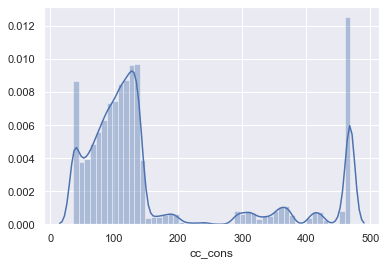

In [32]:
# histogram plot of target variable using seaborn
sns.distplot(y_train)

In [33]:
# skewness treatment of target variable
y_train = np.log(y_train)

In [34]:
# model selection
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# prediction
y_pred = lr.predict(X_test)

In [36]:
y_pred = np.exp(y_pred)

In [37]:
# Evaluation metrics
print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score: ",r2_score(y_test,y_pred))

Test RMSLE: 0.7178458937691298
Test RMSE: 144.108457550699
R2_score:  -0.10074980659191035


In [38]:
# Comparison of predicted values with actual values
print("Prediction for 10 observation:    ",y_pred[0:10])
print("Actual values for 10 observation: ",y_test[0:10].values)

Prediction for 10 observation:     [119.99806119 123.97356525 118.73765788 126.68907292 116.88966653
 126.8980222  137.03372327 127.02200657 123.5882612  124.5955937 ]
Actual values for 10 observation:  [ 74.07428704 107.98611022 343.20256409  69.49100661 109.57189421
 315.45998161 102.45974819 108.66922287  82.56512581 468.7077981 ]
